In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

In [4]:
df = pd.read_csv('train_data.csv')
print(type(df['Points'][0]))

<class 'str'>


In [5]:
cant_array = df['cant'].to_numpy()
gauge_array = df['gauge'].to_numpy()

In [6]:
print(np.mean(cant_array))
print(np.std(cant_array))
print(np.mean(gauge_array))
print(np.std(gauge_array))


-7.614500358864489
1.402972779371225
1435.8015519550079
1.0611073760604646


In [7]:
df['Points'] = df['Points'].apply(lambda x: np.fromstring(x[1:-1], dtype=int, sep=','))

In [8]:
print(type(df['Points'][0]))
print(len(df['Points'][0]))

<class 'numpy.ndarray'>
1001


In [9]:
print(df['Points'].apply(lambda x: np.mean(x)))

0       6355.556444
1       6447.606394
2       6336.035964
3       6263.323676
4       6572.953047
           ...     
7463    2623.045954
7464    2476.458541
7465    2507.168831
7466    2500.217782
7467    2623.209790
Name: Points, Length: 7468, dtype: float64


In [10]:
def mean_wo_zero(points_array):
    mean_array = []
    for i in points_array:
        if i>0: mean_array.append(i)
    return np.mean(mean_array)
average_array = df['Points'].apply(lambda x: mean_wo_zero(x))
print(type(average_array))

<class 'pandas.core.series.Series'>


In [11]:
df.insert(3, "Points Average", average_array)

In [15]:
cloud_average = df2 = df["Points Average"].mean()
print(cloud_average)

8014.644165767762


In [16]:
def polar_to_cartesian(angle_rad, length):
    length = length/1000
    x = length * np.cos(angle_rad) # convert distance from millimeter to meter
    y = length * np.sin(angle_rad)
    return x, y

In [17]:
test_array = np.array(df['Points'].tolist())
print(test_array.shape)

(7468, 1001)


In [37]:
num_elements = 1001
angles_deg = np.linspace(np.radians(5-90),np.radians(354-90),num_elements)

start_point = 0
distance_step = 0.2 # 20 cm

x_points = []
y_points = []
z_points = []
x_plot_points = []
y_plot_points = []
z_plot_points = []
for j, row in enumerate(test_array[0:1000]):
    distance_array = np.arange(start_point, start_point+distance_step, distance_step/1001)
    for i, length in enumerate(row):
        angle = angles_deg[i]
        x,y = polar_to_cartesian(angle, length)
        z = distance_array[i]
        if j<15:
            x_plot_points.append(x)
            y_plot_points.append(y)
            z_plot_points.append(z)
        x_points.append(x)
        y_points.append(y)
        z_points.append(z)
    start_point = distance_array[-1] + distance_step/1001


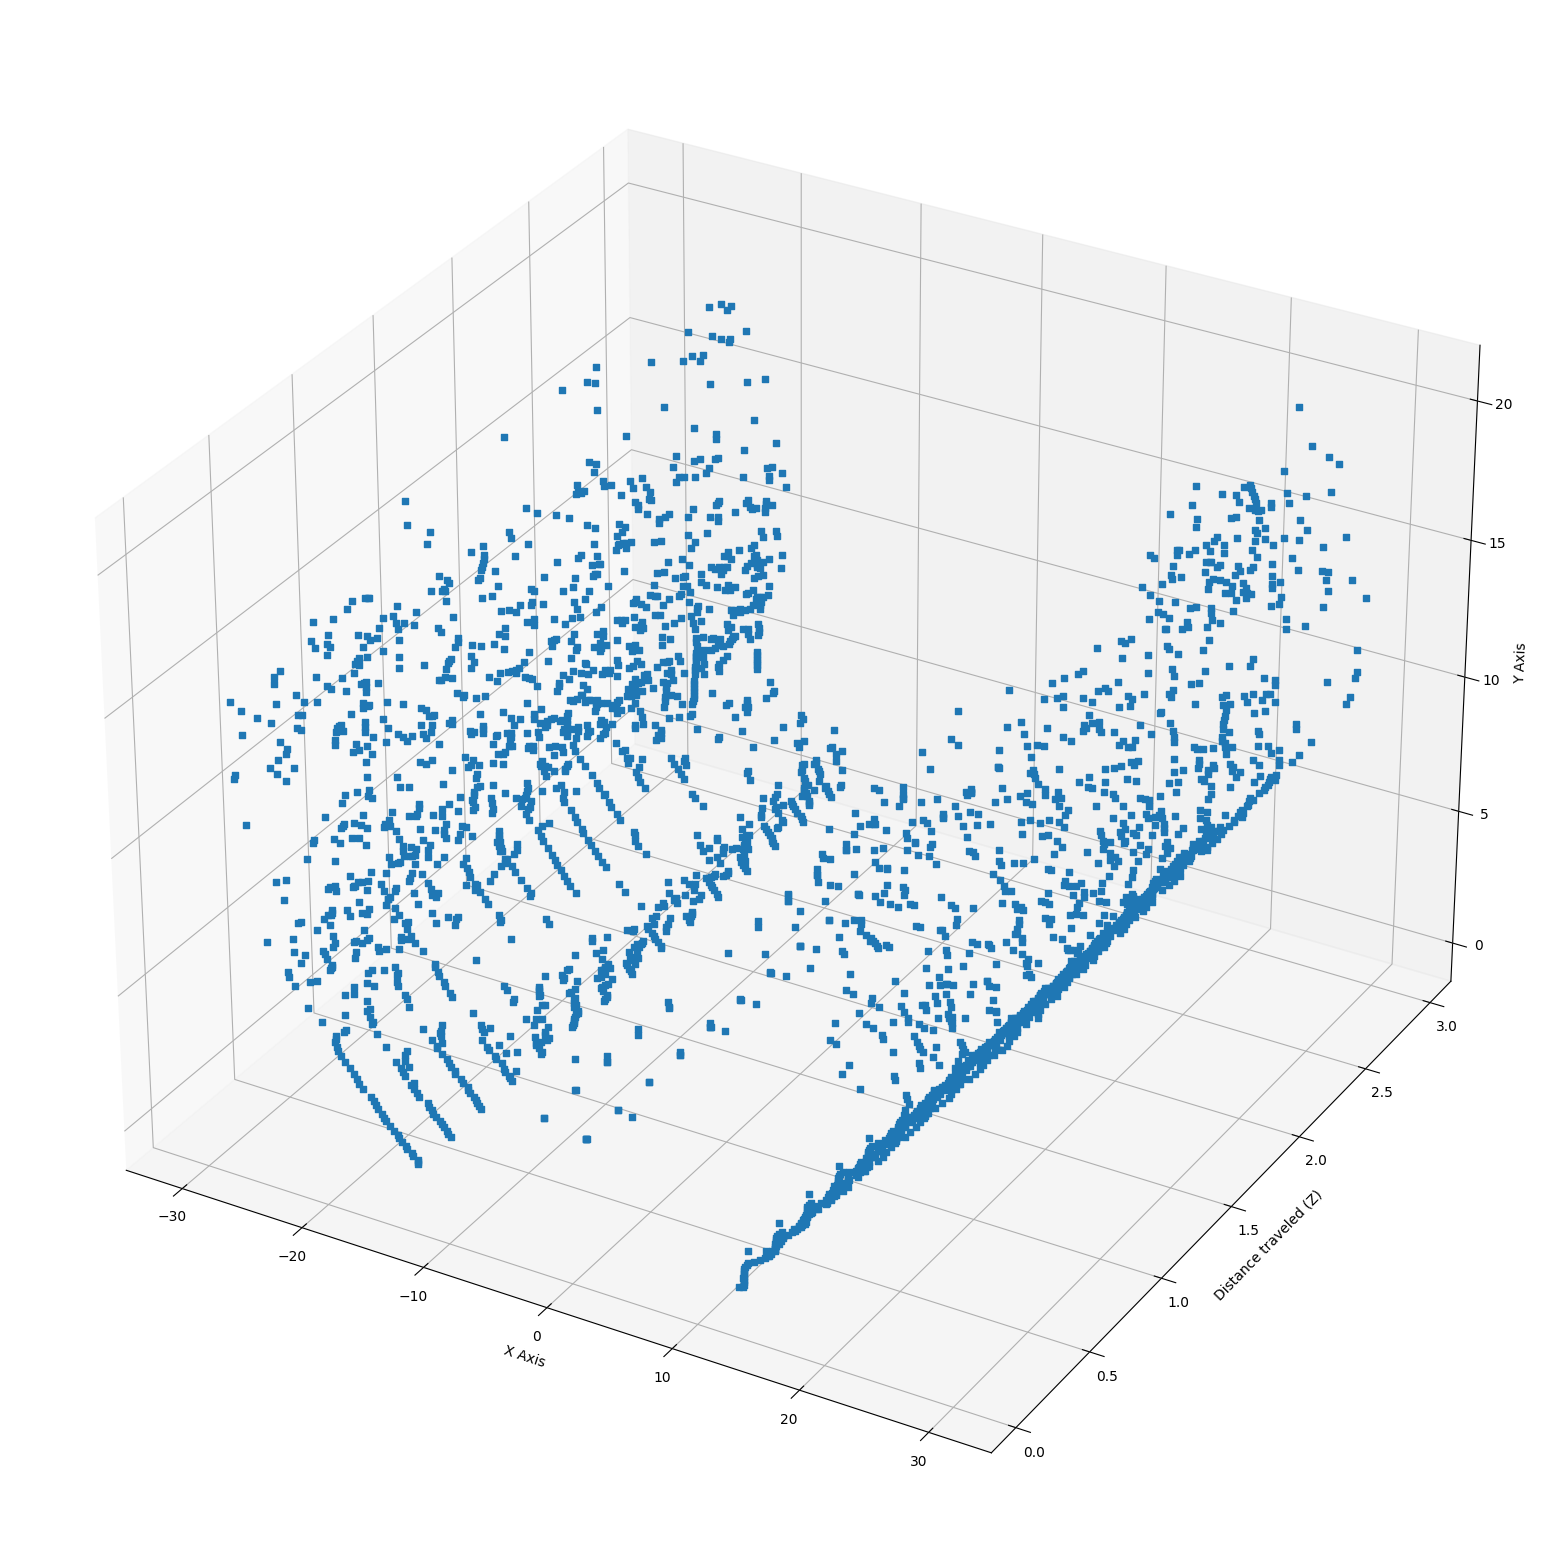

In [25]:
# plot the points
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

for i in range(len(x_plot_points)):
    if y_plot_points[i]>0: ax.scatter(x_plot_points[i],z_plot_points[i],y_plot_points[i],c=['#1f77b4'], marker=",")
ax.set_xlabel('X Axis')
ax.set_ylabel('Distance traveled (Z)')
ax.set_zlabel('Y Axis')
plt.show()

In [38]:
xyz = np.zeros((np.size(x_points), 3))
xyz[:, 0] = np.reshape(x_points, -1)
xyz[:, 1] = np.reshape(y_points, -1)
xyz[:, 2] = np.reshape(z_points, -1)
print('xyz')
print(xyz)

xyz
[[ 1.72132592e-01 -1.96748453e+00  0.00000000e+00]
 [ 1.84113665e-01 -1.96639954e+00  1.99800200e-04]
 [ 1.95194341e-01 -1.95628607e+00  3.99600400e-04]
 ...
 [-2.19509082e-01 -1.86915483e+00  2.00101498e+02]
 [-2.10994878e-01 -1.89629775e+00  2.00101698e+02]
 [-0.00000000e+00 -0.00000000e+00  2.00101898e+02]]


In [39]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyz)
o3d.io.write_point_cloud("pointcloud.ply", pcd)

True